In [1]:
from sklearn.ensemble import RandomForestRegressor

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn.externals import joblib

In [4]:
model = joblib.load("/storage/yw18581/data/trained_models/Leaf_position_regression/leaf_regression_RF_30est_8depth.pkl")

In [5]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [7]:
indices[:10]

array([181180, 160998, 177956, 171486, 157805, 136194, 122734, 163486,
       163576, 140997])

### Generate Index Map

In [21]:
index_map = {}
for i in range(0, 340):
    for j in range(0, 800):
        index_map[(i*800)+j] = (i, j)

In [22]:
max(index_map.keys())

271999

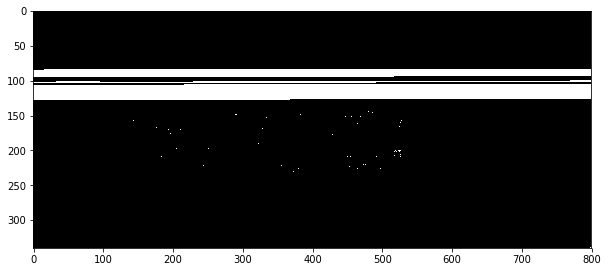

In [29]:
mask = np.zeros(shape=(340, 800), dtype=np.uint)
n_features = (340*800)
n_features_plot = int((n_features * 10) / 100)  # 10% of total
for idx in indices[:n_features_plot]:
    r, c = index_map[idx]
    mask[r, c] = 1
    
fig = plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap=plt.cm.Greys_r)
plt.show()

In [11]:
std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)

In [12]:
std

array([0., 0., 0., ..., 0., 0., 0.])